In [ ]:
import sys
!{sys.executable} -m pip install graphviz

In [ ]:
!{sys.executable} -m pip install pydot

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
import pydot
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
import math
import graphviz
import csv
from sklearn.metrics import accuracy_score

Load dataset on google drive

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
path ="/content/drive/My Drive/"
os.chdir(path)
#os.listdir(path)

Mounted at /content/drive


1.Question 1

In [3]:
data=[]
target=[]
with open('/content/drive/My Drive/data mining/A2/skysurvey/training_data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)
with open('/content/drive/My Drive/data mining/A2/skysurvey/training_class.csv', 'r') as file2:
    reader2 = csv.reader(file2)
    for row2 in reader2:
        target.append(row2)

clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=0.01,random_state=RandomState(2018))
clf = clf.fit(data, target)
feature_names=['ra','dec','u','g','r','i','z','run','rerun','camcol','field','specobjid','redshift','plate','mjd','fiberid']
target_names=['star','galaxy','quasar']
#to visualize the decision tree
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=feature_names,
                         class_names=target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graphv = graphviz.Source(dot_data)

In [4]:
#print the decision tree in a pdf file
#from sklearn.externals.six import StringIO
from six import StringIO
import pydot
import graphviz
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=feature_names,
                         class_names=target_names,
                         filled=True, rounded=True,
                         special_characters=True
                    )
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("/content/drive/My Drive/data mining/A2/skysurveyDefault.pdf")

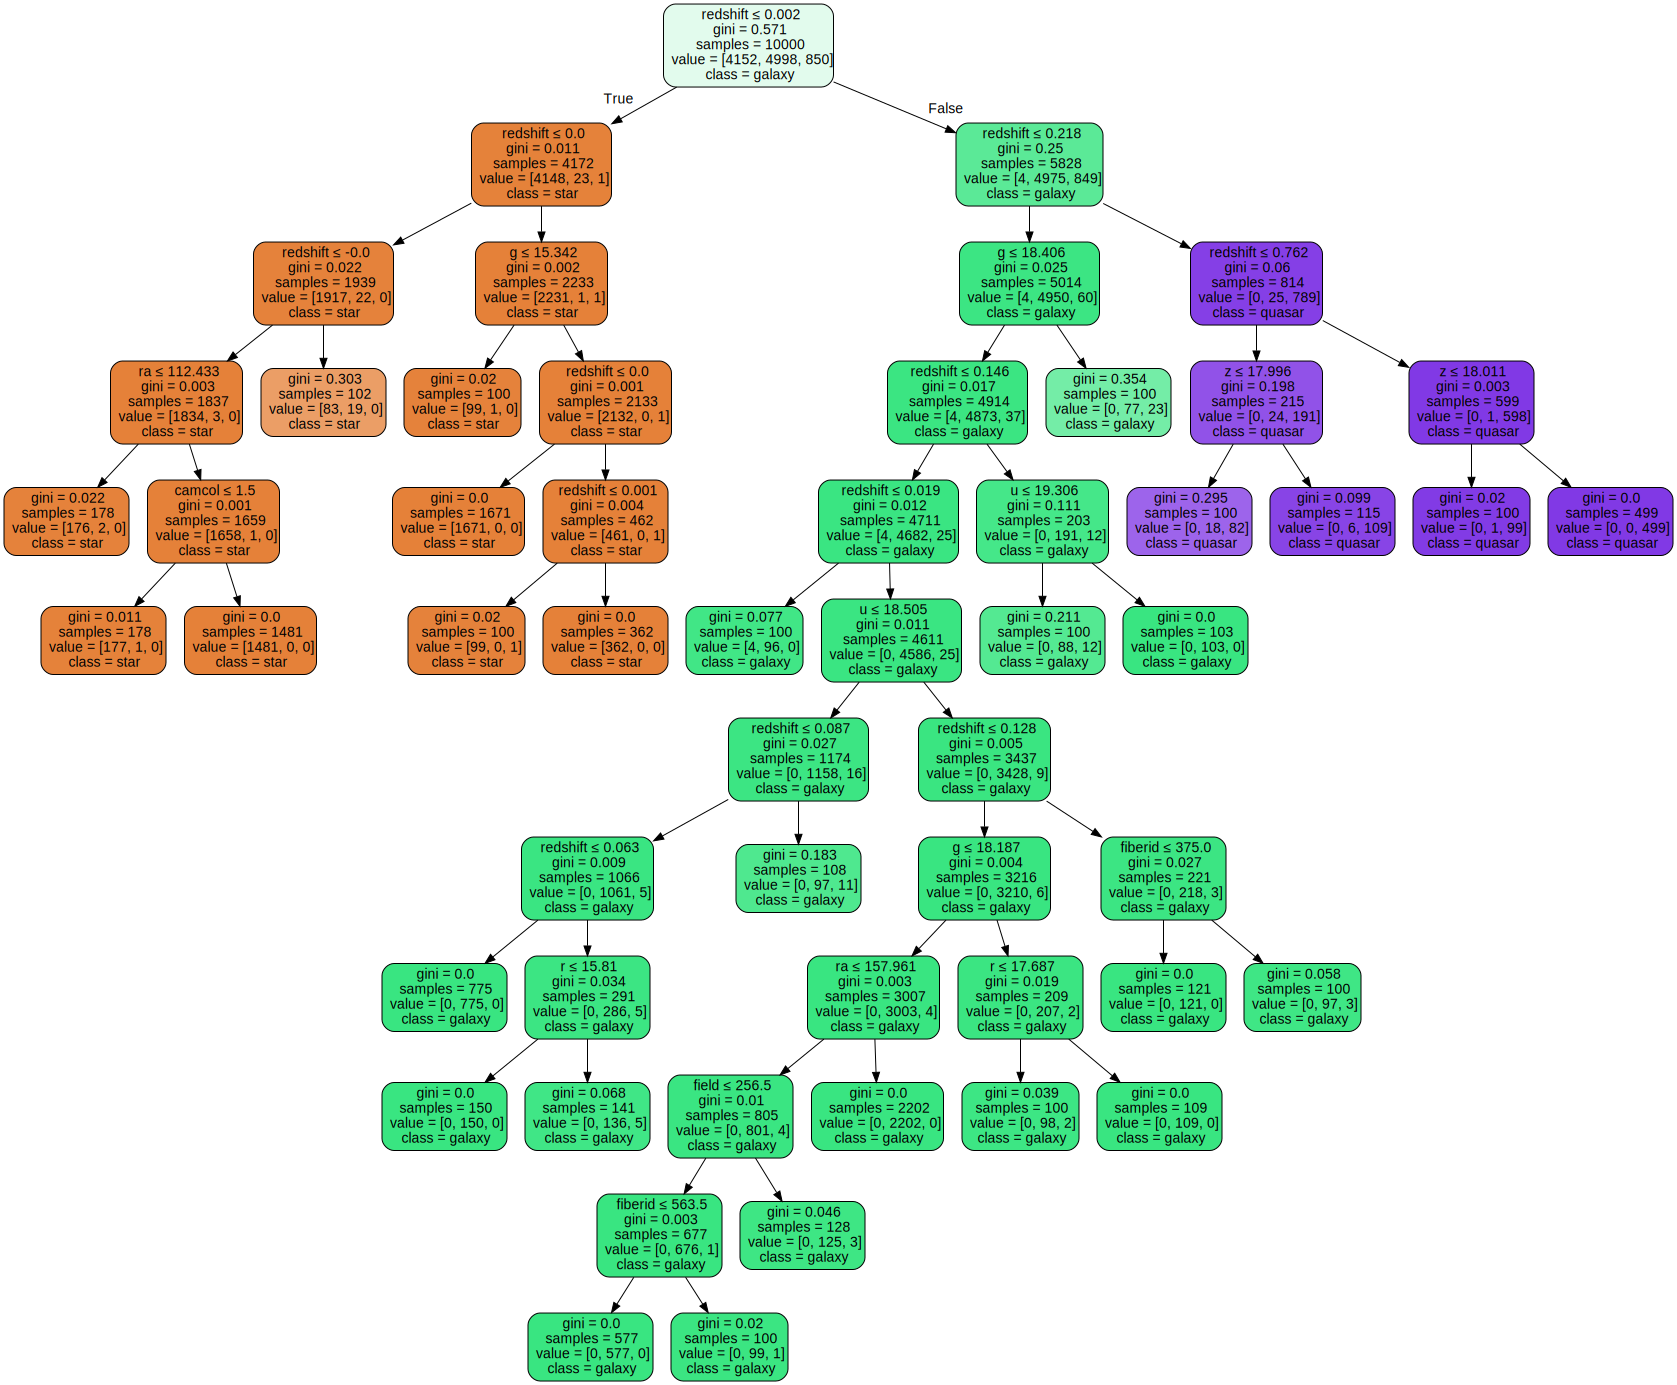

In [5]:
graphv

In [6]:
# Get Training Error in easy way
print (round(len(target)*(1-clf.score(data,target))))

113


2.Question 2

Pessimisitic estimate: \\
Gener. error (model) = training error (model,training data) + alpha * complexity (model) \\
E.g. complexity (model) = num.leaves, alpha=0.5

In [7]:
def Get_Generalization_Error(ctree):
  count=0 # count for training error
  leave=0 # count for leave node
  n_nodes=ctree.tree_.node_count
  for i in range(n_nodes):
    leaf=ctree.tree_.children_left[i]
    if leaf==-1:
      leave=leave+1
      j=0
      for x in ctree.tree_.value[i][0]:
        if j!=np.argmax(ctree.tree_.value[i]):
          count=ctree.tree_.value[i][0][j]+count
        j=j+1
  return count+leave*0.5

In [8]:
print("Generalization Error = ",Get_Generalization_Error(clf))

Generalization Error =  127.0


3.Question 3

The max_depth parameter controls the complexity of the decision tree. When max_depth is set to a smaller value, the decision tree becomes simpler, meaning there are fewer leaf nodes, but the model may underfit the data, resulting in poor performance. \\
When max_depth is set to a larger value, the decision tree becomes more complex and can better fit the training data. Besides, since there was no test data in this experiment, the model will not overfit. \\
In summary, as the max_depth parameter increases, the generalization error first decreases and then increases.

In [9]:
l=[]
for i in range(1,11):
  # print(i)
  clf2 = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=0.01,random_state=RandomState(2018),max_depth=i)
  clf2 = clf2.fit(data, target)
  l.append(Get_Generalization_Error(clf2))
  print("Max Depth = ",i,", Generalization Error = ",Get_Generalization_Error(clf2))

Max Depth =  1 , Generalization Error =  878.0
Max Depth =  2 , Generalization Error =  115.0
Max Depth =  3 , Generalization Error =  117.0
Max Depth =  4 , Generalization Error =  119.5
Max Depth =  5 , Generalization Error =  121.5
Max Depth =  6 , Generalization Error =  122.0
Max Depth =  7 , Generalization Error =  123.0
Max Depth =  8 , Generalization Error =  124.5
Max Depth =  9 , Generalization Error =  126.0
Max Depth =  10 , Generalization Error =  126.5


I have considered the max_depth parameter from 1 to 10, and the best performing decision tree has a max_depth value of 2 and a generalization error of 115.

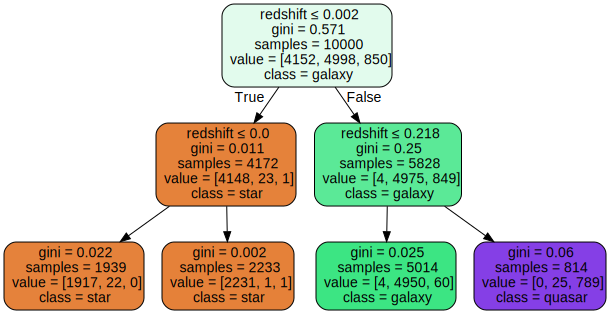

In [10]:
# Best Decision Tree
clf3 = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=0.01,random_state=RandomState(2018),max_depth=2)
clf3 = clf3.fit(data, target)
# dot_data2 = StringIO()
# tree.export_graphviz(clf3, out_file=dot_data2, feature_names=feature_names,
#                          class_names=target_names,
#                          filled=True, rounded=True,
#                          special_characters=True
#                     )
# graph2 = pydot.graph_from_dot_data(dot_data2.getvalue())
# graph2[0].write_pdf("/content/drive/My Drive/data mining/A2/Decision_Tree_Q3.pdf")
dot_data2 = tree.export_graphviz(clf3, out_file=None,
                         feature_names=feature_names,
                         class_names=target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graphv3 = graphviz.Source(dot_data2)
graphv3

4.Question 4

I recommend the decision tree of point 3 with max_depth=2. According to the Occam’s Razor (ORP), when given two models with similar generalization errors, we should prefer the simpler model over the more complex model because for the complex model, there is a greater chance that it was fitted accidentally by errors in data.

In [11]:
from sklearn.metrics import accuracy_score
train_predictions = clf.predict(data)
train_accuracy = accuracy_score(target, train_predictions)
train_predictions3 = clf3.predict(data)
train_accuracy3 = accuracy_score(target, train_predictions3)
print("Accuracy of point 1 :",train_accuracy)
print("Accuracy of point 3 :",train_accuracy3)

Accuracy of point 1 : 0.9887
Accuracy of point 3 : 0.9887


5.Question 5

The most relevant feature is redshift.

In [12]:
# Predict the class value of the top 5 objects in the dataset
x=data[:5]
y=target[:5]
predict=clf3.predict(x)
for i in range(5):
  print("Predict:",predict[i],"-- Label:",int(y[i][0]))# y[i]

Predict: 0 -- Label: 0
Predict: 0 -- Label: 0
Predict: 1 -- Label: 1
Predict: 0 -- Label: 0
Predict: 0 -- Label: 0


In [13]:
feature_importance = clf3.feature_importances_
most_important_feature_index = np.argmax(feature_importance)
most_important_feature_name = feature_names[most_important_feature_index]
print("Most relevant feature:", most_important_feature_name)

Most relevant feature: redshift


6.Questioin 6

I think it could be pruned to improve the generalization error because the two leaf nodes of the left subtree predict the same class, pruning can reduce the complexity of the tree, thereby reducing generalization errors.

7.Question 7

The generalization error improves from 115 to 114.5. The training error of the tree remains unchanged after pruning, while the model complexity decreases.

In [14]:
path = clf3.cost_complexity_pruning_path(data, target)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf4 = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha,criterion='gini',min_samples_leaf=0.01,random_state=RandomState(2018),max_depth=2)
    clf4.fit(data, target)
    clfs.append(clf4)
print(clfs)
goal=[]
for t in clfs:
  goal.append(Get_Generalization_Error(t))
# print(goal)

[DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.01,
                       random_state=RandomState(MT19937) at 0x7BDBB1340340), DecisionTreeClassifier(ccp_alpha=2.3681270242658335e-05, max_depth=2,
                       min_samples_leaf=0.01,
                       random_state=RandomState(MT19937) at 0x7BDBB1340540), DecisionTreeClassifier(ccp_alpha=0.1282544893518754, max_depth=2,
                       min_samples_leaf=0.01,
                       random_state=RandomState(MT19937) at 0x7BDBB1340440), DecisionTreeClassifier(ccp_alpha=0.4200633127026666, max_depth=2,
                       min_samples_leaf=0.01,
                       random_state=RandomState(MT19937) at 0x7BDBB1340640)]


Generalization Error =  114.5
Accuracy : 0.9887


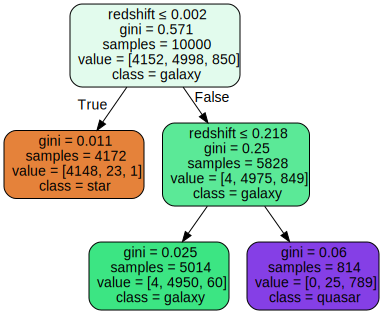

In [15]:
# print(clfs[(goal.index(min(goal)))])
train_predictions7 = clfs[(goal.index(min(goal)))].predict(data)
train_accuracy7 = accuracy_score(target, train_predictions7)
print("Generalization Error = ",Get_Generalization_Error(clfs[(goal.index(min(goal)))]))
print("Accuracy :",train_accuracy7)

dot_data7 = tree.export_graphviz(clfs[(goal.index(min(goal)))], out_file=None,
                         feature_names=feature_names,
                         class_names=target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graphv7 = graphviz.Source(dot_data7)
graphv7